In [2]:
!pip install tensorflow==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 61.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2

In [ ]:
import zipfile

# Specify the path to your zip archive and the target directory for extraction
zip_file = '/content/drive/MyDrive/Sound_Controling/validation.zip'  # Replace with the actual filename
target_directory = '/content/drive/MyDrive/Sound_Controling'  # Replace with the desired target directory

# Unzip the archive
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(target_directory)

# List the contents of the target directory
import os
os.listdir(target_directory)


['fist.zip',
 'no_gesture.zip',
 'ok.zip',
 'palm.zip',
 'two_up.zip',
 'no_gesture',
 'ok',
 '.ipynb_checkpoints',
 'fist',
 'palm',
 'two_up',
 'train.zip',
 'validation.zip',
 'model_v1.h5',
 'train',
 'validation']

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

# Specify the path to the directory you want to clear
directory_path = '/content/drive/MyDrive/Sound_Controling/train'  # Replace with the actual directory path

# Check if the directory exists
if os.path.exists(directory_path) and os.path.isdir(directory_path):
    # Clear the contents of the directory
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)
        if os.path.isfile(item_path):
            os.unlink(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)

    print(f"Contents of '{directory_path}' have been deleted.")
else:
    print(f"Directory '{directory_path}' does not exist.")


Contents of '/content/drive/MyDrive/Sound_Controling/train' have been deleted.


In [ ]:
import os

# Specify the path to the folder you want to count
folder_path = '/content/drive/MyDrive/Sound_Controling/train/palm'  # Replace with the actual folder path

# Initialize counters for directories and images
directory_count = 0
image_count = 0

# Iterate through the contents of the folder
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    if os.path.isdir(item_path):
        directory_count += 1
    elif os.path.isfile(item_path):
        image_count += 1

# Print the counts
print(f"Number of directories in '{folder_path}': {directory_count}")
print(f"Number of images in '{folder_path}': {image_count}")


Number of directories in '/content/drive/MyDrive/Sound_Controling/train/palm': 0
Number of images in '/content/drive/MyDrive/Sound_Controling/train/palm': 5340


In [ ]:
import os
import shutil
import random

# Paths to the source class folders
class_folders = [
                 '/content/drive/MyDrive/Sound_Controling/fist',
                 '/content/drive/MyDrive/Sound_Controling/palm',
                 '/content/drive/MyDrive/Sound_Controling/two_up'
]

# Paths for the training and validation folders
training_directory = '/content/drive/MyDrive/Sound_Controling/train'
validation_directory = '/content/drive/MyDrive/Sound_Controling/validation'

# Percentage of data to be used for validation (adjust as needed)
validation_split = 0.1

# Create training and validation directories if they don't exist
os.makedirs(training_directory, exist_ok=True)
os.makedirs(validation_directory, exist_ok=True)

# Iterate through each class folder
for class_folder in class_folders:
    class_name = os.path.basename(class_folder)

    # Create class subdirectories in training and validation folders
    train_class_dir = os.path.join(training_directory, class_name)
    valid_class_dir = os.path.join(validation_directory, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(valid_class_dir, exist_ok=True)

    # List all image files in the class folder
    images = os.listdir(class_folder)

    # Calculate the number of images for validation
    num_validation = int(len(images) * validation_split)

    # Shuffle the list of images
    random.shuffle(images)

    # Split the images into training and validation sets
    train_images = images[num_validation:]
    valid_images = images[:num_validation]

    # Copy images to training and validation directories
    for image in train_images:
        source_path = os.path.join(class_folder, image)
        destination_path = os.path.join(train_class_dir, image)
        shutil.copy(source_path, destination_path)

    for image in valid_images:
        source_path = os.path.join(class_folder, image)
        destination_path = os.path.join(valid_class_dir, image)
        shutil.copy(source_path, destination_path)

print("Data has been organized into training and validation sets.")


Data has been organized into training and validation sets.


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , BatchNormalization , MaxPooling2D,Flatten , Dense,Dropout ,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [ ]:
import tensorflow as tf

# Define the paths to your training and validation data directories
train_data_dir = '/content/drive/MyDrive/Sound_Controling/train'
validation_data_dir = '/content/drive/MyDrive/Sound_Controling/validation'

# Set batch size and image size
batch_size = 32
image_size = (256, 256)  # Adjust the image size as needed

# Create the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    labels='inferred',
    label_mode='categorical',  # or 'int' if you want integer labels
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123,  # Set a random seed for reproducibility
    validation_split=None,  # This is the training dataset
)

# Create the validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_data_dir,
    labels='inferred',
    label_mode='categorical',  # or 'int' if you want integer labels
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,  # Validation dataset does not need shuffling
    validation_split=None,
)

# You can perform additional preprocessing steps as needed for your dataset

# Print a few samples from the training dataset
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels)


Found 28501 files belonging to 5 classes.
Found 5689 files belonging to 5 classes.
(32, 256, 256, 3)
tf.Tensor(
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]], shape=(32, 5), dtype=float32)


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
c=[]
cont=0
for i in validation_ds.take(1):
  print(i)
  cont+=1
  c.append(cont)
print(c)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.3372549 , 0.28235295, 0.09019608],
         [0.33693323, 0.28203124, 0.08987439],
         [0.33382353, 0.27892157, 0.08676471]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.3384957 , 0.28359374, 0.09143689],
         [0.3372549 , 0.28235295, 0.09019608],
         [0.3372549 , 0.28235295, 0.09019608]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.34301472, 0.28811276, 0.09595589],
         [0.33970588, 0.28480393, 0.09264706],
         [0.33970588, 0.28480393, 0.09264706]],

        ...,

        [[0.99607843, 0.99607843

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model.fit(train_ds , epochs=1,validation_data = validation_ds)

891/891 [==============================] - 119s 132ms/step - loss: 0.0561 - accuracy: 0.9847 - val_loss: 0.7762 - val_accuracy: 0.8333


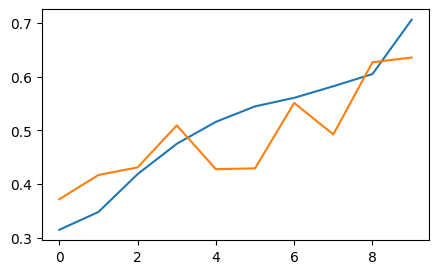

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Sound_Controling/model_v1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/Sound_Controling/model_v1.h5')

In [ ]:
model.evaluate(validation_ds)

178/178 [==============================] - 520s 3s/step - loss: 0.7762 - accuracy: 0.8333


[0.7761571407318115, 0.8332747220993042]

In [ ]:
import h5py
h5py.__version__

'3.9.0'

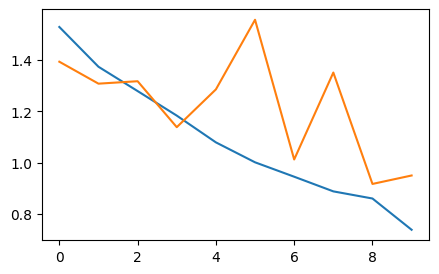

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

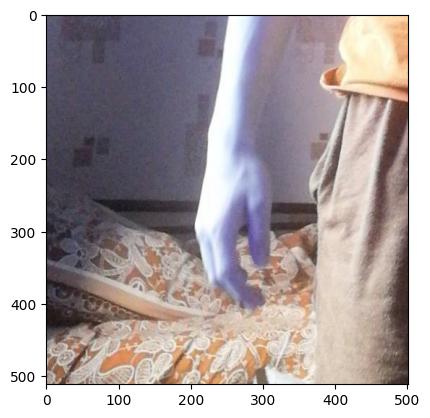

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_image = cv2.imread("/content/drive/MyDrive/Sound_Controling/validation/no_gesture/1c7f4e42-9a7d-472c-ae96-01a19f828203.jpeg")
image = tf.constant(test_image,dtype=tf.float32)/255
plt.imshow(image)

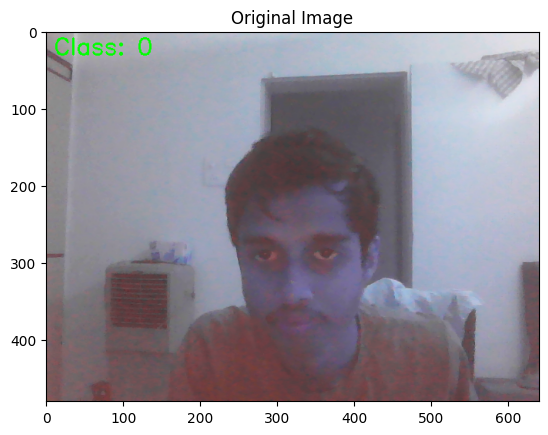

error: ignored

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load your original image
original_image = cv2.imread('/content/Webcam Classification_screenshot_10.11.2023.png')  # Assuming grayscale image, adjust as needed

# Check if the image is loaded successfully
if original_image is None:
    print("Error: Unable to load the image.")
else:
    # Display the original image using Matplotlib
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.show()
enhanced_image = cv2.equalizeHist(original_image)
plt.imshow(enhanced_image, cmap='gray')


In [ ]:
image.shape

TensorShape([512, 502, 3])

In [ ]:
class_name = ['fist','no_gesture','ok','palm','two_up']
test_image = tf.image.resize(test_image, (256, 256))

#im = tf.constant(test_image,dtype=tf.float32)
im = tf.expand_dims(test_image, axis=0)
print(class_name[tf.argmax(model.predict(im),axis=-1).numpy()[0]])

1/1 [==============================] - 0s 20ms/step
no_gesture


In [ ]:
for batch, (images, labels) in enumerate(train_ds):
    try:
        print(f"Batch {batch + 1}, Images shape: {images.shape}, Labels shape: {labels.shape}")
    except Exception as e:
        print(f"Error occurred at Batch {batch + 1}: {str(e)}")
        continue  # Skip this batch and proceed to the next one




Batch 1, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 2, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 3, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 4, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 5, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 6, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 7, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 8, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 9, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 10, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 11, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 12, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 13, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 14, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 15, Images shape: (32, 256, 256, 3), Labels shape: (32, 5)
Batch 16, Images shape: (32, 256, 

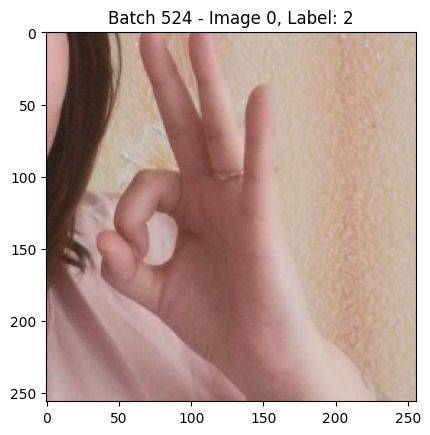

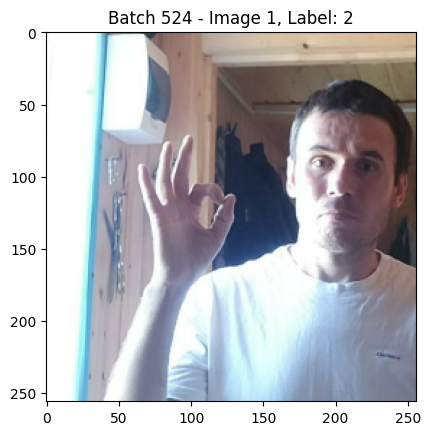

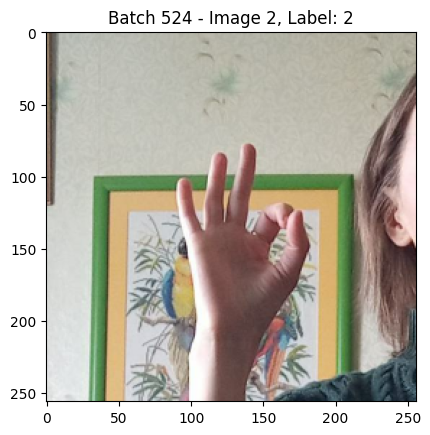

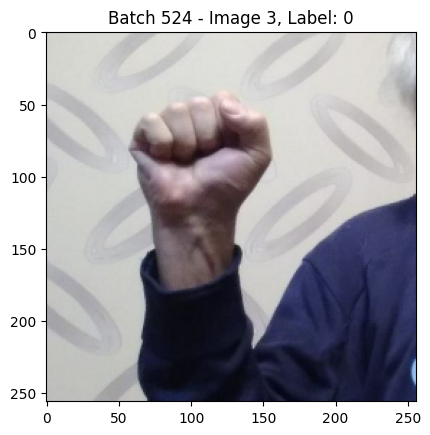

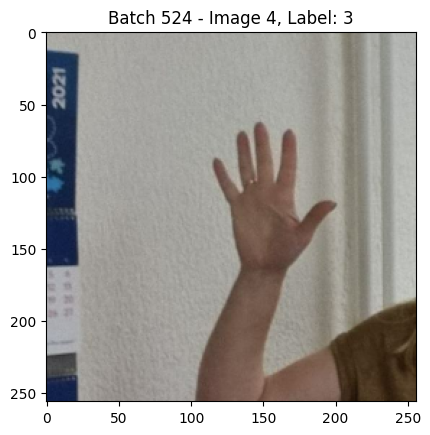

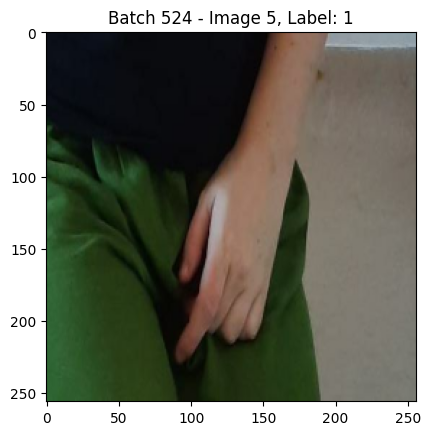

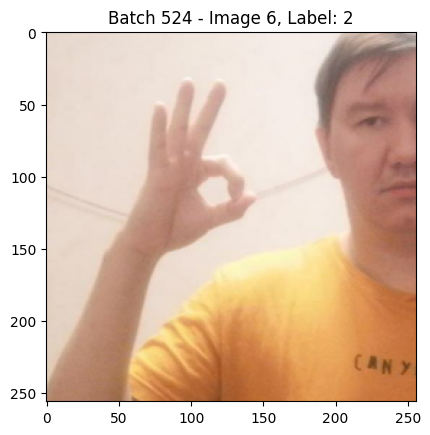

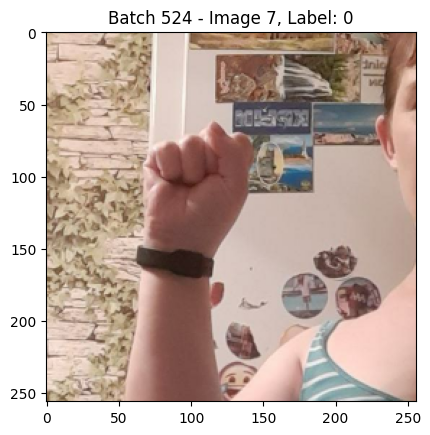

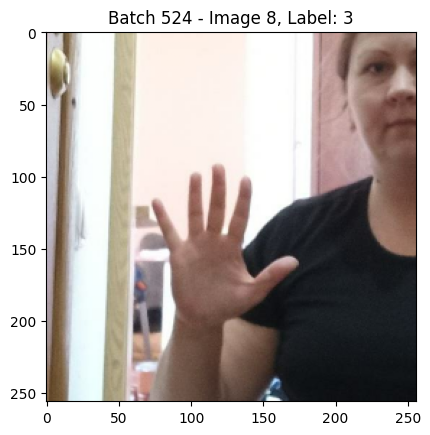

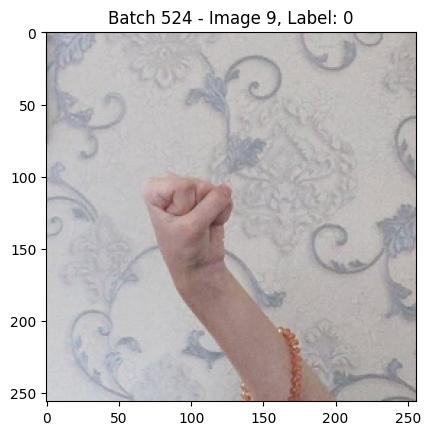

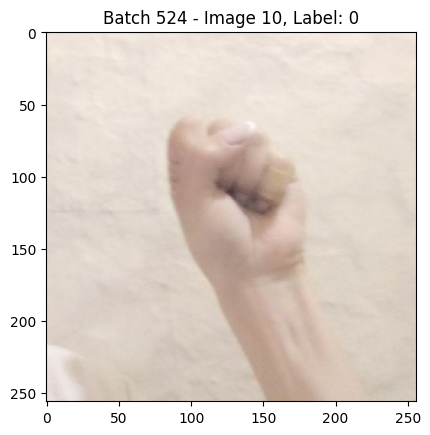

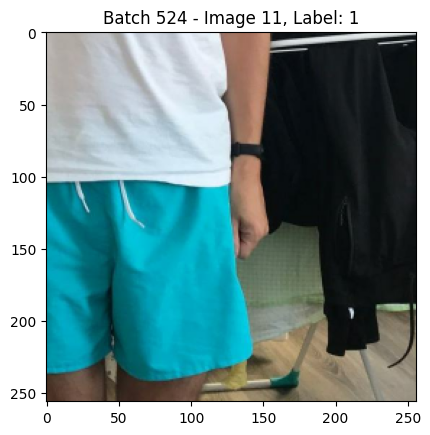

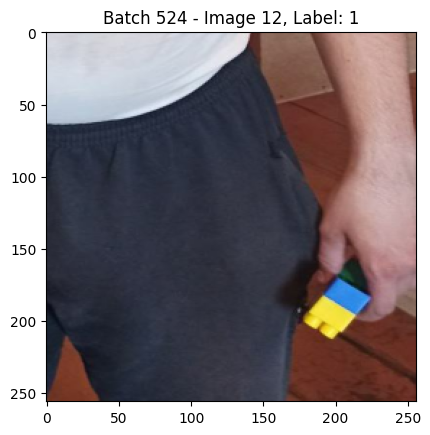

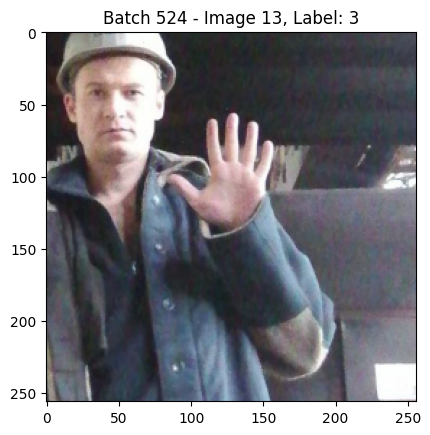

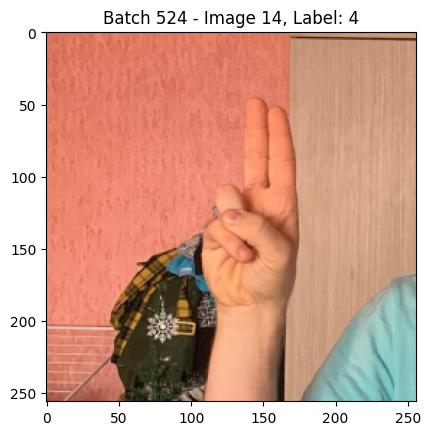

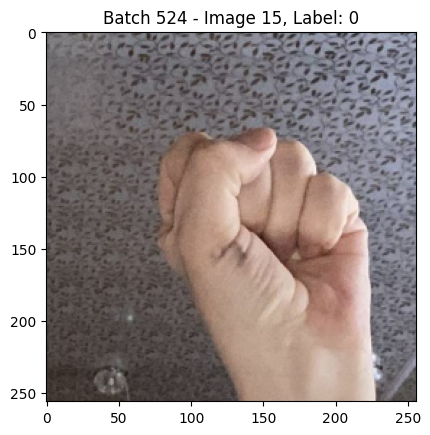

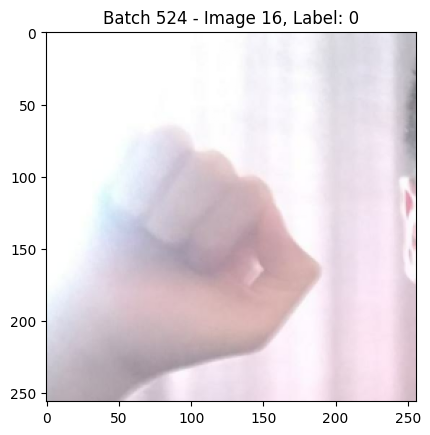

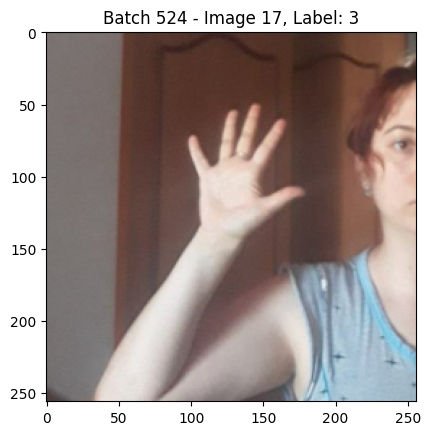

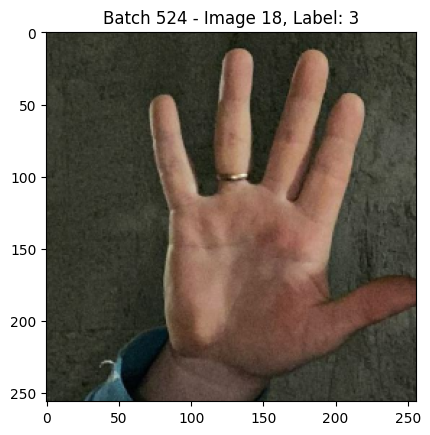

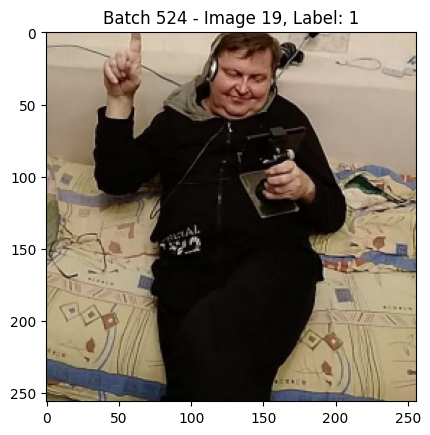

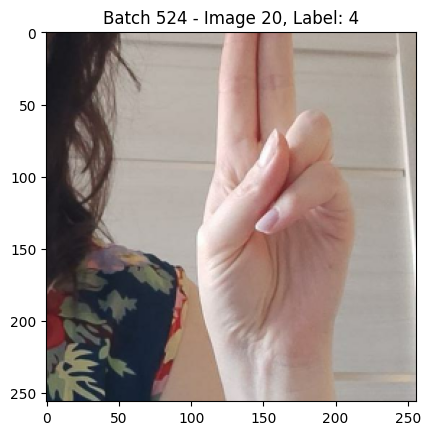

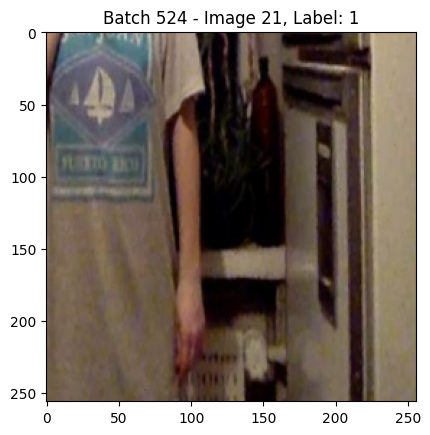

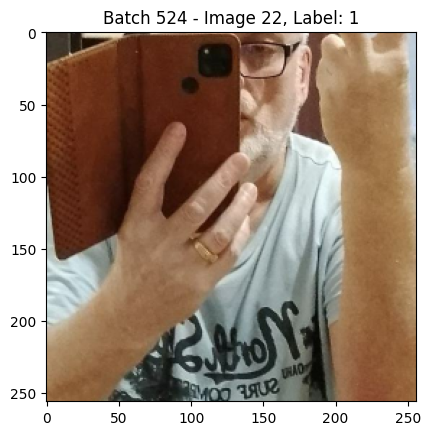

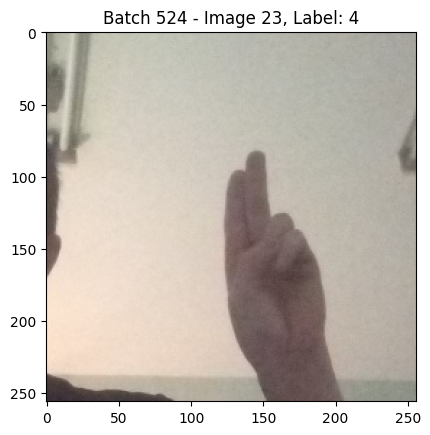

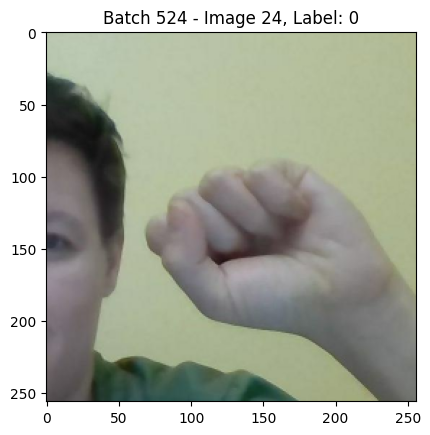

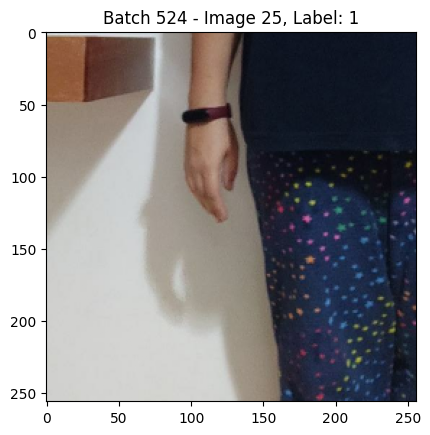

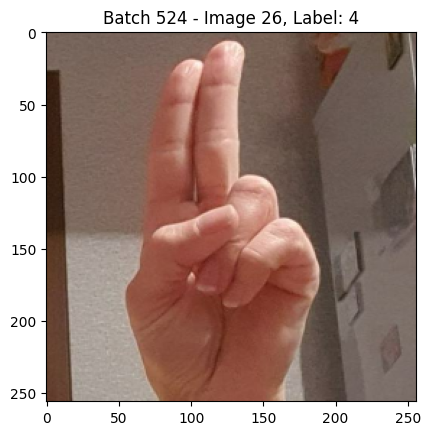

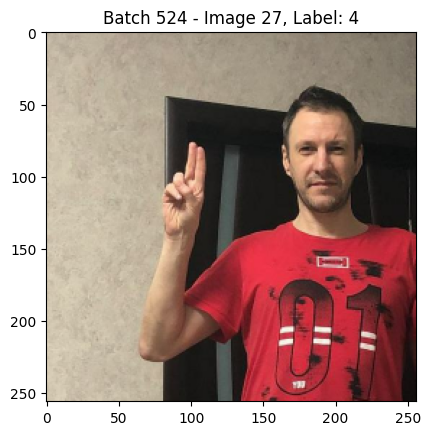

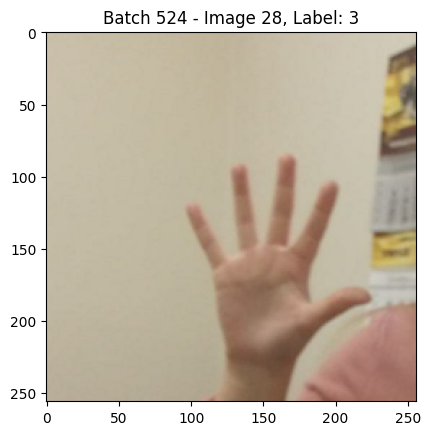

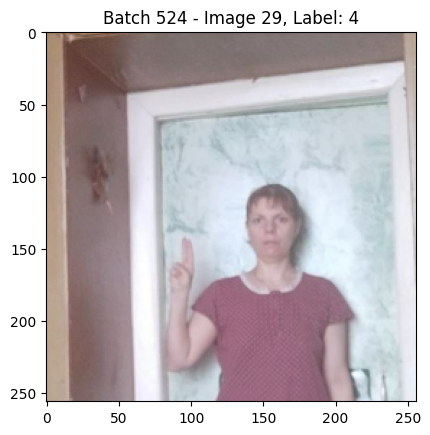

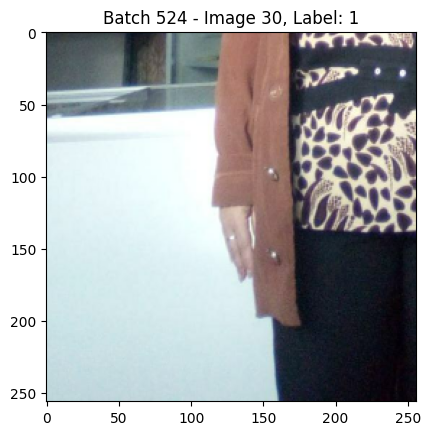

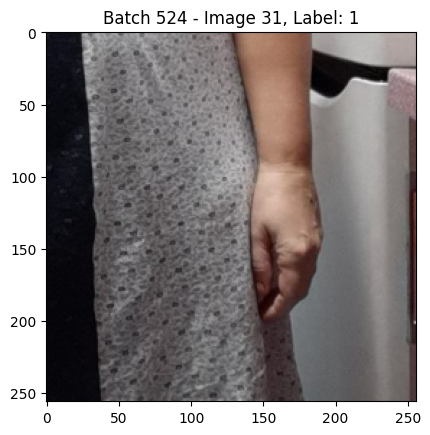

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

# Iterate through batch 524
for batch, (images, labels) in enumerate(train_ds):
    if batch == 124:
        for i in range(len(images)):
            plt.figure()
            plt.imshow(images[i].numpy())
            plt.title(f"Batch 524 - Image {i}, Label: {labels[i].numpy()}")
            plt.show()


In [ ]:
batch_number_to_skip = 523

new_train_ds = train_ds.unbatch()  # Unbatch the dataset
new_train_ds = new_train_ds.filter(lambda x, batch_number: batch_number != batch_number_to_skip)
new_train_ds = new_train_ds.batch(32)  # Rebatch the dataset with the corrupted batch removed


In [ ]:
from PIL import Image
import os

def is_image_corrupted(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return False
    except Exception as e:
        print(f"Corrupted image: {file_path}, Error: {e}")
        return True

# Set the path to your image directory
image_dir = '/content/drive/MyDrive/Sound_Controling/validation/fist'

# List all files in the directory
file_list = os.listdir(image_dir)

# Iterate through the files and check for corrupted images
corrupted_images = []

for file_name in file_list:
    file_path = os.path.join(image_dir, file_name)
    if is_image_corrupted(file_path):
        corrupted_images.append(file_path)

print(f"Number of corrupted images: {len(corrupted_images)}")
print("Corrupted image paths:")
for img_path in corrupted_images:
    print(img_path)


Number of corrupted images: 0
Corrupted image paths:


In [ ]:
import os

# Set the path to the folder containing the image
folder_path = '/content/drive/MyDrive/Sound_Controling/validation/fist'

# Specify the filename of the image you want to delete
image_to_delete = '22c23492-96d8-4d31-9325-0490896b0a1e.jpeg'  # Replace with the actual filename

# Create the full path to the image file
image_path = os.path.join(folder_path, image_to_delete)

# Check if the file exists before attempting to delete
if os.path.exists(image_path):
    try:
        os.remove(image_path)  # Delete the specific image file
        print(f"Deleted: {image_to_delete}")
    except Exception as e:
        print(f"Failed to delete {image_to_delete}: {e}")
else:
    print(f"The specified image file does not exist: {image_to_delete}")


Deleted: 22c23492-96d8-4d31-9325-0490896b0a1e.jpeg


In [ ]:
import cv2
import tensorflow as tf
import numpy as np

# Load your deep learning model
model = tf.keras.models.load_model(r'/content/drive/MyDrive/Sound_Controling/model_v1.h5')

# Open a connection to the webcam (assuming it's the first camera, change index if needed)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Check if the frame is valid
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Preprocess the frame for your model
    resized_frame = cv2.resize(frame, (256, 256))  # Adjust size based on your model input size
    input_data = np.expand_dims(resized_frame, axis=0)
    input_data = input_data / 255.0  # Normalize if needed

    # Make predictions with your model
    predictions = model.predict(input_data)

    # Assuming your model outputs class probabilities, get the predicted class
    predicted_class = np.argmax(predictions)

    # Display the predicted class on the frame
    cv2.putText(frame, f'Class: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Webcam Classification', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()



Error: Failed to capture frame.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
!pip show cv2

In [ ]:
import cv2

In [ ]:
cv2.__version__

'4.8.0'

# Model 2

In [4]:
import tensorflow as tf

# Define the paths to your training and validation data directories
train_data_dir = '/content/drive/MyDrive/Sound_Controling/train'
validation_data_dir = '/content/drive/MyDrive/Sound_Controling/validation'

# Set batch size and image size
batch_size = 32
image_size = (224, 224)  # Adjust the image size as needed

# Create the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    labels='inferred',
    label_mode='categorical',  # or 'int' if you want integer labels
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123,  # Set a random seed for reproducibility
    validation_split=None,  # This is the training dataset
)

# Create the validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_data_dir,
    labels='inferred',
    label_mode='categorical',  # or 'int' if you want integer labels
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,  # Validation dataset does not need shuffling
    validation_split=None,
)

Found 28499 files belonging to 5 classes.
Found 5686 files belonging to 5 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet',include_top=False, input_shape=(224,224,3))

9406464/9406464 [==============================] - 2s 0us/step


In [6]:
for layers in base_model.layers :
  layers.trainnable = False
  print(layers)

In [9]:
model2 = Sequential()
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(5,activation='softmax'))

In [10]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [11]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history3 = model2.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
 14/891 [..............................] - ETA: 1:38:19 - loss: 0.9581 - accuracy: 0.6161

KeyboardInterrupt: ignored

In [ ]:
model2.save('/content/drive/MyDrive/Sound_Controling/model2v_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tf.__version__

'2.14.0'

In [ ]:
import numpy as np
np.__version__

'1.23.5'

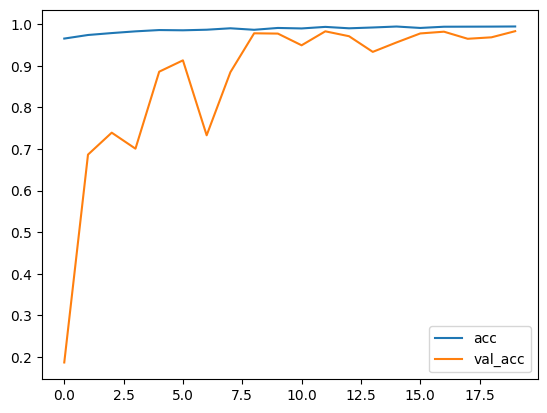

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.plot()
plt.legend()

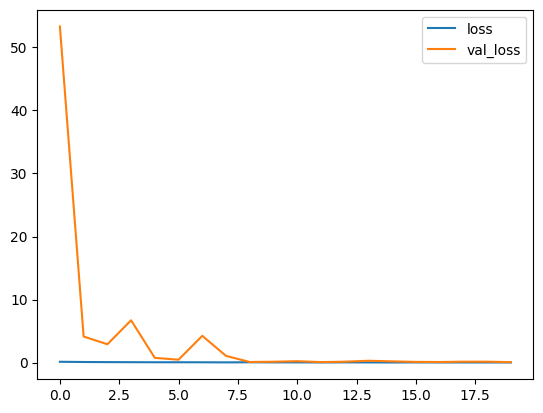

In [ ]:
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot()
plt.legend()